In [15]:
# packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# packages for modek evaluation and classification models
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tqdm import tqdm

# packages for saving the model
from pickle import dump, load

# script that has modeling functions in it
import modeling
# packages for parallel processing
from multiprocessing import Pool
import time

In [2]:
# reads in the data 
df = pd.read_csv('creditcard.csv')

In [3]:
# looks at 10 random rows in the data
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
63098,50554.0,1.166753,0.106718,0.037510,0.543880,-0.133286,-0.826923,0.368047,-0.250321,-0.104200,...,-0.486722,-1.613532,0.135220,-0.152774,0.142084,-0.105961,-0.056082,0.025944,74.28,0
283410,171571.0,-1.089402,0.456534,1.350756,-0.944041,1.073631,-1.348160,0.938652,-0.153383,-0.467290,...,-0.248490,-0.921017,-0.221282,0.035565,0.584309,0.234782,-0.082659,0.046128,4.86,0
123667,77015.0,0.878055,-1.775494,1.405104,-0.053223,-2.043468,0.882459,-1.404881,0.362399,0.545399,...,-0.336320,-0.453131,-0.173985,0.107308,0.108472,1.109625,-0.006143,0.042527,197.84,0
93789,64586.0,-0.008437,-0.190730,1.963238,-1.459993,-1.109320,-0.566877,-0.202622,-0.449144,-2.457173,...,-0.276901,-0.210542,0.050410,0.387973,-0.675055,-0.385294,-0.092105,-0.062147,21.00,0
45306,42285.0,0.784517,-0.413992,0.326760,1.627207,-0.544273,-0.322051,0.282364,-0.053249,0.333597,...,0.025056,-0.139448,-0.178081,0.402084,0.532133,-0.350207,0.001778,0.050138,193.00,0
142999,85059.0,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,...,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,1.00,0
71544,54332.0,1.457665,-0.584446,0.396655,-0.866750,-0.858737,-0.300287,-0.842416,-0.079728,-0.516689,...,0.240366,0.659298,-0.204947,-0.543342,0.589271,-0.045470,0.026611,0.013048,11.00,0
276918,167359.0,1.803399,0.320727,0.337091,3.735369,-0.237984,0.371665,-0.448726,0.207701,-0.747317,...,-0.134348,-0.423744,0.428279,-0.009524,-0.607548,-0.407685,0.005687,-0.032126,13.77,0
208660,137215.0,2.026497,-0.625955,-1.769159,-0.377397,0.430064,0.201631,-0.006339,-0.116667,-0.877989,...,-0.251135,0.084482,0.181234,-0.977078,-0.070683,0.700657,-0.018380,-0.079653,28.00,0
185576,126729.0,1.928783,-0.053184,-1.780025,1.244189,0.487603,-0.653208,0.500303,-0.188089,0.157222,...,0.089881,0.297853,-0.075341,-0.423563,0.412633,-0.486562,-0.035170,-0.071197,49.57,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# looks at the balance of Fraud and None Fraud
class_name ={0:'No Fraud',1:'Fraud'}
df['Class'].value_counts().rename(index=class_name)

No Fraud    284315
Fraud          492
Name: Class, dtype: int64

/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


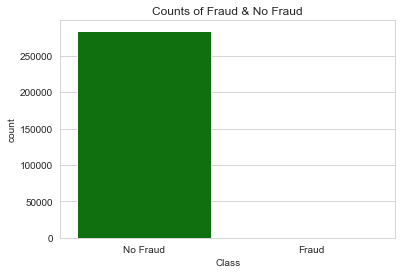

In [6]:
colors = ["g", "r"]
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

x = df['Class'].replace(to_replace=[1, 0], value=['Fraud','No Fraud'])
sns.countplot(x,palette=colors,data=df)
plt.title('Counts of Fraud & No Fraud')
plt.show()

In [7]:
# splitting the data into train test split 
X = df.drop('Class',axis=1)
y = df['Class']
validation_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [8]:
# concatenate our training data back together
data = pd.concat([X_train,y_train],axis=1)

#separate minority and majority classes
no_fraud = data[data['Class']==0]
fraud = data[data['Class']== 1]

# unsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(no_fraud), # match number in majority class
                          random_state=42) 
# combines majority and unsampled minority
unsampled = pd.concat([no_fraud,fraud_upsampled])

# resplitting the data
y_train_new = unsampled['Class']
X_train_new = unsampled.drop('Class',axis=1)
y_train_new.value_counts().rename(index=class_name)

No Fraud    227453
Fraud       227453
Name: Class, dtype: int64

/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


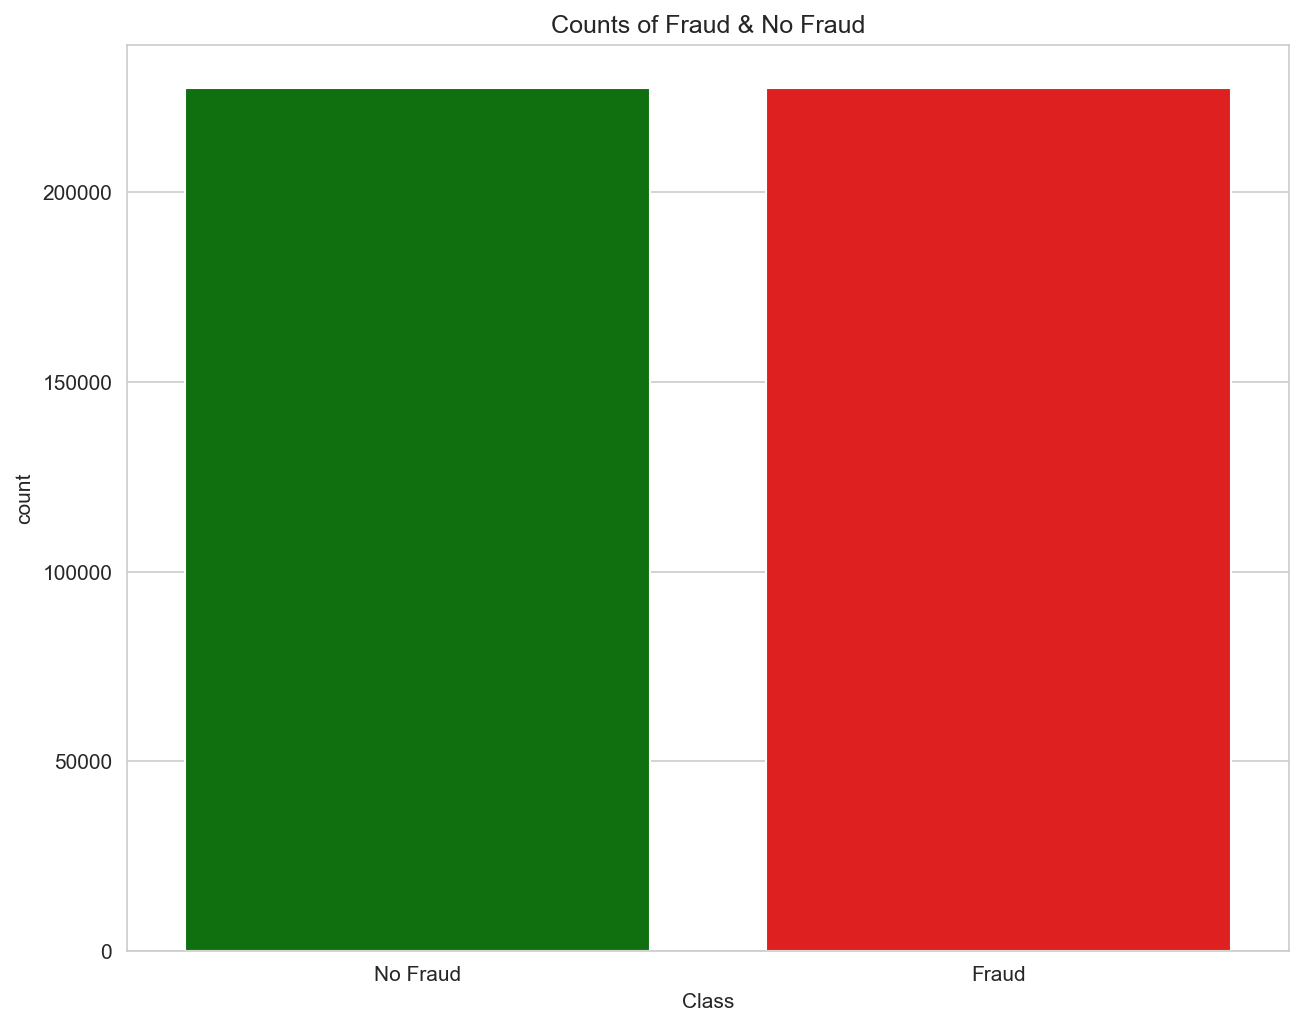

In [9]:
plt.figure(figsize=(10,8),dpi=150)
x = unsampled['Class'].replace(to_replace=[1, 0], value=['Fraud','No Fraud'])
sns.countplot( x,data=unsampled,palette=colors)
plt.title('Counts of Fraud & No Fraud')
plt.show()

In [10]:
# scaling the inputs of the dataset
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test = scaler.transform(X_test)

In [22]:
# function that takes in model and training score and stores them in a df
# setting up inital dataframe
model_result_df=pd.DataFrame(columns=["model_name","TrainScore"])

def stores_model_results(modl_name,train_score):
    global model_result_df # changes the state of the global variable 
    row_loc=model_result_df.shape[0]+1
    model_result_df.loc[row_loc,["model_name","TrainScore"]]=[modl_name,train_score]

In [27]:
# Run each model and show the combined results.
# def show_model_scores(x,y):
#     global model_result_df
#     model_result_df=model_result_df.iloc[0:0] # resets the display df
#     scoring = 'accuracy'
#     #model_result_df = pd.DataFrame(columns = ['Model', 'TrainScore'])
#     for name,model in tqdm( [('LR',LogisticRegression(solver='lbfgs',max_iter=1000)),
#                    ('KNN',KNeighborsClassifier()),
#                    ('CART',DecisionTreeClassifier()),
#                    ('XGB',XGBClassifier()),
#                    ('ETC',ExtraTreesClassifier()),
#                     ('RF',RandomForestClassifier()),
#                   ('Ada',AdaBoostClassifier()),
#                         ('GBM',GradientBoostingClassifier()),
#                        ('SVM',SVC())]):
#         kflod = KFold(n_splits=5,random_state=seed,shuffle=True)
#         cv_results = cross_val_score(model,x,y,cv=kflod,scoring=scoring)
#         #t = pd.Series({'Model':name,'TrainScore': cv_results})
#         #model_result_df= model_result_df.append(t,ignore_index=True)
#         stores_model_results(name, cv_results)
#         #model_result_df.sort_values(by="TrainScore",ascending=False,inplace=True,axis=1)
#     print(model_result_df)
#     #plots out the result
#     sns.set_style("darkgrid")
#     plt.figure(figsize=(10,8),dpi=150)
#     axes = sns.boxenplot(data=model_result_df,x='model_name',y='TrainScore')
#     plt.title('Training Accuracy Scores')
#     plt.show()

In [31]:
def show_model_scores(x,y):
    #global model_result_df
    #model_result_df=model_result_df.iloc[0:0] # resets the display df
    scoring = 'accuracy'
    names =[]
    results =[]
    #model_result_df = pd.DataFrame(columns = ['Model', 'TrainScore'])
    for name,model in tqdm( [('LR',LogisticRegression(solver='lbfgs',max_iter=1000)),
                   ('KNN',KNeighborsClassifier()),
                   ('CART',DecisionTreeClassifier()),
                   ('XGB',XGBClassifier()),
                   ('ETC',ExtraTreesClassifier()),
                    ('RF',RandomForestClassifier()),
                  ('Ada',AdaBoostClassifier()),
                        ('GBM',GradientBoostingClassifier()),
                       ('SVM',SVC())]):
        kflod = KFold(n_splits=5,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model,x,y,cv=kflod,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #t = pd.Series({'Model':name,'TrainScore': cv_results})
        #model_result_df= model_result_df.append(t,ignore_index=True)
        stores_model_results(name, cv_results)
        #model_result_df.sort_values(by="TrainScore",ascending=False,inplace=True,axis=1)
        print(f'Model {name} has an average accuracy score of {cv_results.mean()}')
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,8),dpi=150)
    axes = sns.boxplot(data=results) # left, bottom, width, height (range 0 to 1)
    ind = np.arange(len(names))
    axes.set_xticks(ind)
    axes.set_xticklabels(names)
    plt.title('Training Accuracy Errors')
    plt.show()

  0%|                                                     | 0/9 [00:00<?, ?it/s]/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 11%|█████                                        | 1/9 [00:25<03:23, 25.

Model LR has an average accuracy score of 0.9504974664049332


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 22%|█████████                                | 2/9 [54:38<3:44:26, 1923.78s/it]

Model KNN has an average accuracy score of 0.9996416840324456


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 33%|█████████████▋                           | 3/9 [55:32<1:47:00, 1070.01s/it]/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python

Model CART has an average accuracy score of 0.9997384074033562
[18:57:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 44%|██████████████████▋                       | 4/9 [59:27<1:01:42, 740.60s/it]

Model XGB has an average accuracy score of 0.999912069770437


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 56%|███████████████████████▎                  | 5/9 [1:02:37<36:07, 541.85s/it]

Model ETC has an average accuracy score of 0.9999670261306919


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 67%|████████████████████████████              | 6/9 [1:14:02<29:31, 590.64s/it]

Model RF has an average accuracy score of 0.9999494400654502


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 78%|████████████████████████████████▋         | 7/9 [1:20:19<17:21, 520.71s/it]

Model Ada has an average accuracy score of 0.9713567126974588


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
 89%|█████████████████████████████████████▎    | 8/9 [1:47:24<14:32, 872.26s/it]

Model GBM has an average accuracy score of 0.995497970390774


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
100%|█████████████████████████████████████████| 9/9 [3:52:04<00:00, 1547.13s/it]


Model SVM has an average accuracy score of 0.9956716332169234


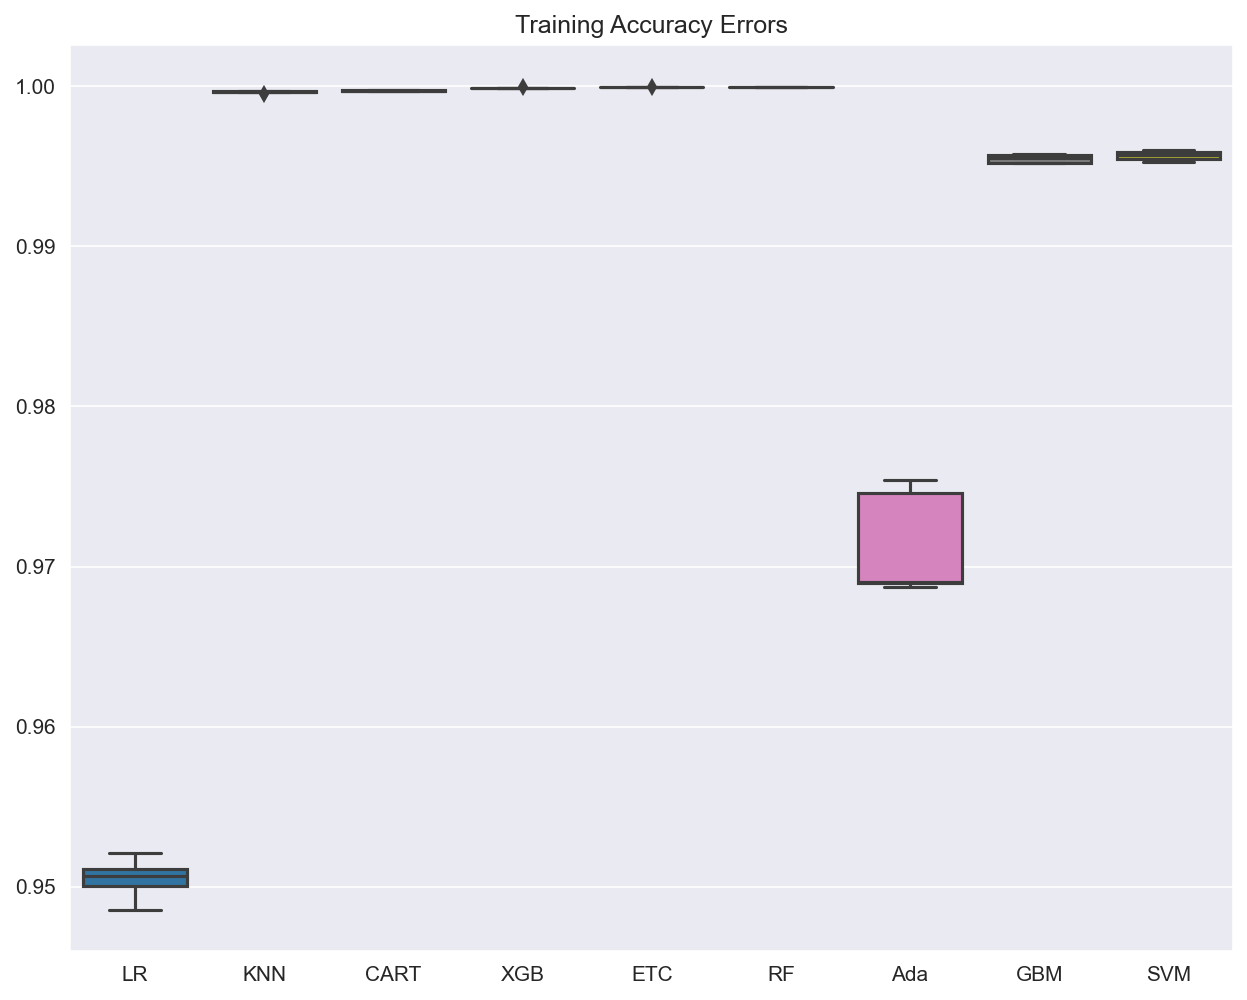

In [32]:
show_model_scores(X_train_new,y_train_new)

# ExtraTrees Classifier Tuning 

In [ ]:
param_tuning={
    'n_estimators' : [10, 50, 100, 500, 1000, 5000],
    'max_features' : [i for i in range(1,21)],
    'min_samples_split': [i for i in range(2,15)],
}
# using grid search to find the best parameters
scoring = 'accuracy'
kflod = KFold(n_splits=5,random_state=seed,shuffle=True)

gs = GridSearchCV (estimator = ExtraTreesClassifier(),
                       param_grid = param_tuning,
                       cv = kflod,
                       n_jobs= -1,
                       verbose = 1,scoring=scoring)
# fitting the grid search model to our training dataset
gs.fit(X_train,y_train)
print(f'Best accuracy score of {gs.best_score_} using these params {gs.best_params_}')

Fitting 5 folds for each of 1560 candidates, totalling 7800 fits
